In [1]:
import pandas as pd
from pandas import DataFrame
yearly=pd.read_csv("C:/Users/Prachi/Desktop/datasets/yearly_deaths_by_clinic.csv")
yearly


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [2]:
yearly["proportion_deaths"]=yearly.births/yearly.deaths
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,12.810127
1,1842,3287,518,clinic 1,6.345560
2,1843,3060,274,clinic 1,11.167883
3,1844,3157,260,clinic 1,12.142308
4,1845,3492,241,clinic 1,14.489627
5,1846,4010,459,clinic 1,8.736383
6,1841,2442,86,clinic 2,28.395349
7,1842,2659,202,clinic 2,13.163366
8,1843,2739,164,clinic 2,16.701220
9,1844,2956,68,clinic 2,43.470588


In [3]:
yearly1 =yearly[yearly['clinic']=='clinic 1']
yearly2 = yearly[yearly['clinic']=='clinic 2']
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1          12.810127
1  1842    3287     518  clinic 1           6.345560
2  1843    3060     274  clinic 1          11.167883
3  1844    3157     260  clinic 1          12.142308
4  1845    3492     241  clinic 1          14.489627
5  1846    4010     459  clinic 1           8.736383


Text(0, 0.5, 'Proportion deaths')

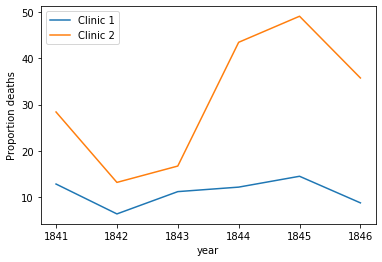

In [4]:
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = yearly1.plot(x='year',y='proportion_deaths',label='Clinic 1')
yearly2.plot(x='year',y='proportion_deaths',label='Clinic 2', ax=ax)
ax.set_ylabel('Proportion deaths')

In [6]:
monthly = pd.read_csv('C:/Users/Prachi/Desktop/datasets/monthly_deaths.csv',parse_dates=['date'])
monthly['proportion_deaths'] = monthly.deaths / monthly.births
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


Text(0, 0.5, 'Proportion deaths')

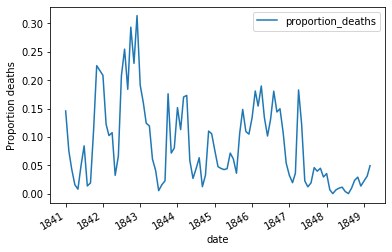

In [7]:
%matplotlib inline
ax = monthly.plot(x='date',y='proportion_deaths')
ax.set_ylabel('Proportion deaths')

Text(0, 0.5, 'Proportion deaths')

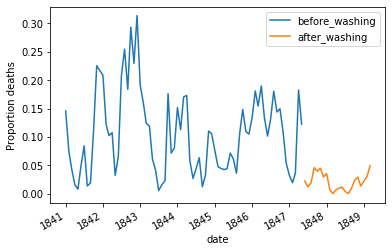

In [8]:
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')
before_washing = monthly[monthly['date']< handwashing_start]
after_washing = monthly[monthly['date']>= handwashing_start]

%matplotlib inline
ax=before_washing.plot(x='date',y='proportion_deaths',label='before_washing')
after_washing.plot(x='date',y='proportion_deaths',label='after_washing', ax=ax)
ax.set_ylabel('Proportion deaths')

In [9]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean()-before_proportion.mean()
mean_diff

-0.0839566075118334

In [10]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1,replace=True)
    boot_after = after_proportion.sample(frac=1,replace=True)
    boot_mean_diff.append(boot_after.mean()- boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -0.100370
0.975   -0.066349
dtype: float64

In [11]:
doctors_should_wash_their_hands = True